# Campeonato Brasileiro - Campeonato

Esse projeto usa dados fictícios, encontrados na plataforma *Kaggle*: https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol

### Tratamento dos dados

In [38]:
import pandas as pd
import os

cartoes = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - cartoes.csv')
gols = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - gols.csv')
estadios = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - estadios.csv')
df = pd.read_csv(os.getcwd() + '\data\campeonato-brasileiro - base.csv', parse_dates=['data'], dayfirst=True)

In [39]:
df['posse_de_bola_mandante'] = df['posse_de_bola_mandante'].str.replace(',', '.').astype(float)
df['posse_de_bola_visitante'] = df['posse_de_bola_visitante'].str.replace(',', '.').astype(float)

df['precisao_passes_mandante'] = df['precisao_passes_mandante'].str.replace(',', '.').astype(float)
df['precisao_passes_visitante'] = df['precisao_passes_visitante'].str.replace(',', '.').astype(float)

df.dtypes

ID                                  float64
rodata                              float64
data                         datetime64[ns]
hora                                 object
mandante                             object
visitante                            object
formacao_mandante                    object
formacao_visitante                   object
tecnico_mandante                     object
tecnico_visitante                    object
vencedor                             object
arena                                object
mandante_Placar                     float64
visitante_Placar                    float64
mandante_Estado                      object
visitante_Estado                     object
pontos_mandante                       int64
chutes_mandante                       int64
chutes_no_alvo_mandante               int64
posse_de_bola_mandante              float64
passes_mandante                       int64
precisao_passes_mandante            float64
faltas_mandante                 

In [40]:
df["resultado_mandante"] = ["Vitoria" if i == 3 else "Empate" if i == 1 else "Derrota" for i in df["pontos_mandante"]]
df["resultado_visitante"] = ["Vitoria" if i == 3 else "Empate" if i == 1 else "Derrota" for i in df["pontos_visitante"]]

In [76]:
df = df[df["posse_de_bola_mandante"] != 0]

Posse de bola e vitória x derrota. Tem relação?

<AxesSubplot: >

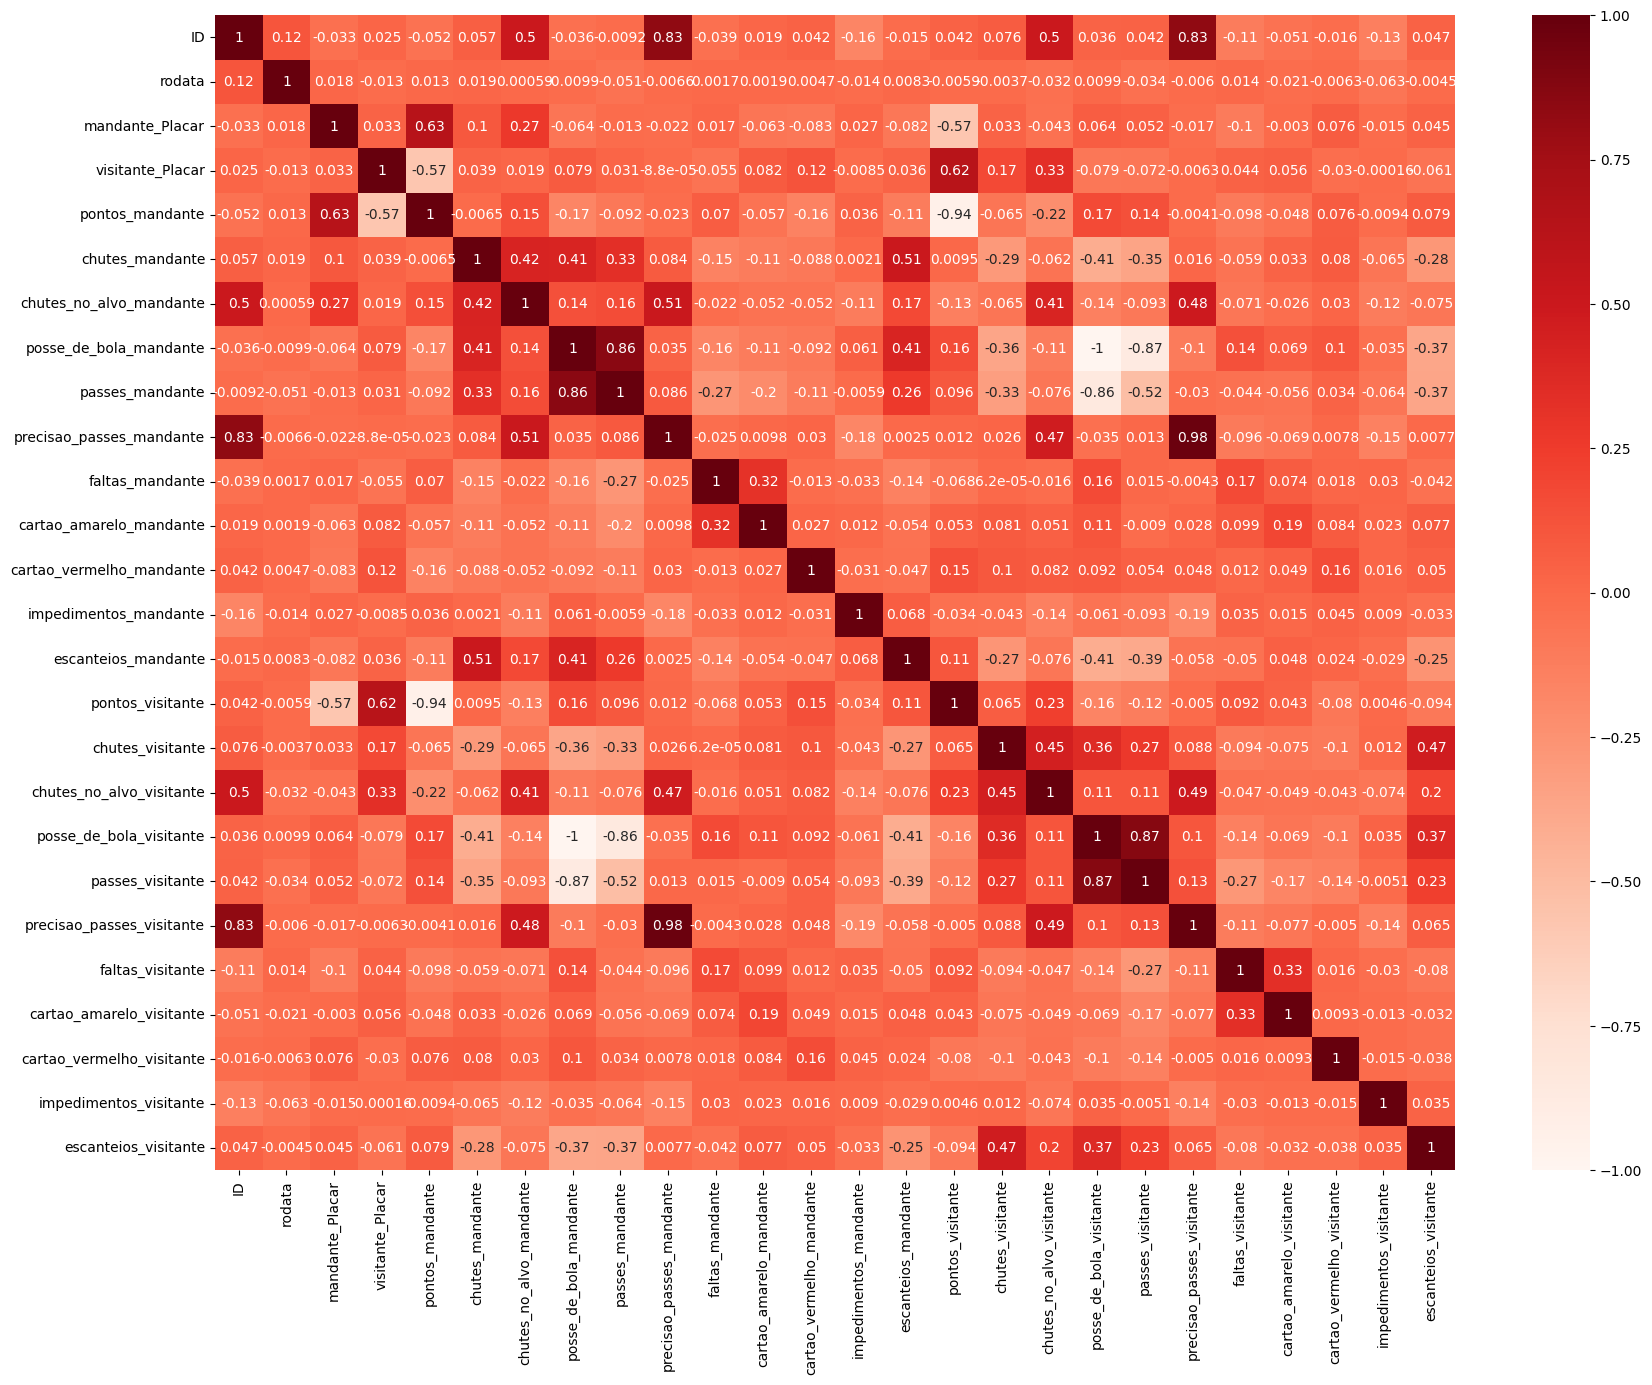

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)

In [78]:
df.corr()["pontos_mandante"].sort_values(ascending=False)

pontos_mandante              1.000000
mandante_Placar              0.629231
posse_de_bola_visitante      0.169287
chutes_no_alvo_mandante      0.146805
passes_visitante             0.139568
escanteios_visitante         0.079462
cartao_vermelho_visitante    0.076438
faltas_mandante              0.070254
impedimentos_mandante        0.036498
rodata                       0.013165
precisao_passes_visitante   -0.004071
chutes_mandante             -0.006533
impedimentos_visitante      -0.009389
precisao_passes_mandante    -0.022554
cartao_amarelo_visitante    -0.047644
ID                          -0.052048
cartao_amarelo_mandante     -0.056579
chutes_visitante            -0.065431
passes_mandante             -0.092425
faltas_visitante            -0.098479
escanteios_mandante         -0.112464
cartao_vermelho_mandante    -0.155514
posse_de_bola_mandante      -0.169287
chutes_no_alvo_visitante    -0.219959
visitante_Placar            -0.571106
pontos_visitante            -0.938637
Name: pontos

In [117]:
regression = df.select_dtypes(exclude='object')
regression = regression.select_dtypes(exclude='datetime64[ns]')
regression = regression.select_dtypes(exclude='string')

y = regression["mandante_Placar"]
del regression["mandante_Placar"]
del regression["rodata"]
del regression["visitante_Placar"]
del regression["pontos_mandante"]
del regression["pontos_visitante"]
x = regression

X = x.values
Y = y.values

regression.dtypes

ID                           float64
chutes_mandante                int64
chutes_no_alvo_mandante        int64
posse_de_bola_mandante       float64
passes_mandante                int64
precisao_passes_mandante     float64
faltas_mandante                int64
cartao_amarelo_mandante        int64
cartao_vermelho_mandante       int64
impedimentos_mandante          int64
escanteios_mandante            int64
chutes_visitante               int64
chutes_no_alvo_visitante       int64
posse_de_bola_visitante      float64
passes_visitante               int64
precisao_passes_visitante    float64
faltas_visitante               int64
cartao_amarelo_visitante       int64
cartao_vermelho_visitante      int64
impedimentos_visitante         int64
escanteios_visitante           int64
dtype: object

R² score: 66.74450795520754


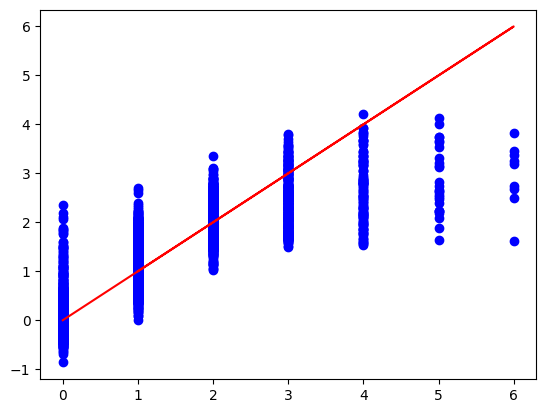

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

print('R² score:', r2_score(Y, lin_reg.predict(X))*100)

predictArray_lin = lin_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

R² score: 94.24510465384928


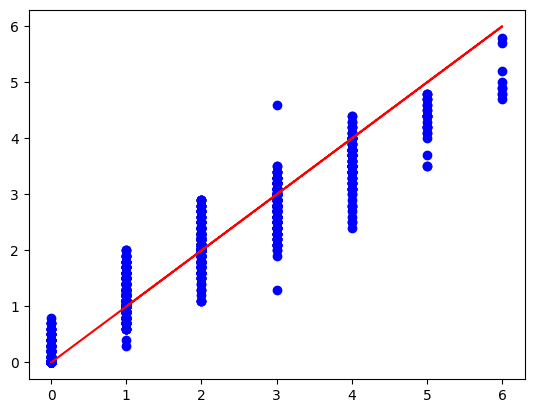

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print('R² score:', r2_score(Y, rf_reg.predict(X))*100)

predictArray_lin = rf_reg.predict(X)
plt.scatter(Y,predictArray_lin, color="b")
plt.plot(Y,Y, color="r")

In [118]:
importances = list(rf_reg.feature_importances_)
feature_list = list(regression.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: passes_visitante     Importance: 0.31
Variable: chutes_no_alvo_mandante Importance: 0.19
Variable: posse_de_bola_mandante Importance: 0.16
Variable: precisao_passes_mandante Importance: 0.05
Variable: ID                   Importance: 0.02
Variable: chutes_mandante      Importance: 0.02
Variable: passes_mandante      Importance: 0.02
Variable: cartao_amarelo_mandante Importance: 0.02
Variable: impedimentos_mandante Importance: 0.02
Variable: precisao_passes_visitante Importance: 0.02
Variable: cartao_vermelho_visitante Importance: 0.02
Variable: escanteios_visitante Importance: 0.02
Variable: faltas_mandante      Importance: 0.01
Variable: cartao_vermelho_mandante Importance: 0.01
Variable: escanteios_mandante  Importance: 0.01
Variable: chutes_no_alvo_visitante Importance: 0.01
Variable: posse_de_bola_visitante Importance: 0.01
Variable: faltas_visitante     Importance: 0.01
Variable: cartao_amarelo_visitante Importance: 0.01
Variable: impedimentos_visitante Importance: 0.01
